## Classification - Prediction of Iris species : setosa, versicolor,virginica

#### 1. Exploratory Data Analysis
##### 1.1 import library

In [1]:
# pandas - data analysis library
import pandas as pd

#scientific computing library
import numpy as np

# data visualization library
import matplotlib.pyplot as plt

# line required for inline charts/plots
%matplotlib inline

# for high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

##### 1.2 import dataset. Dataset is downloaded from kaggle

In [2]:
# read dataset and assign to df_iris. make sure the data is same working directory
df_iris = pd.read_csv('iris.csv')

In [3]:
# check first five row of dataframe
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# get summary
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
# drop id column
df_iris = df_iris.drop(['Id'], axis = 1)

In [6]:
# statistic summary
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#findout no of rows for each Species. to check whether dataset is balanced or not
print(df_iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


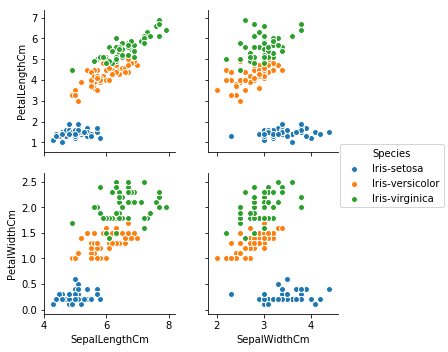

In [8]:
sns.pairplot(df_iris,x_vars=['SepalLengthCm','SepalWidthCm'], 
             y_vars=['PetalLengthCm','PetalWidthCm'],hue='Species')


### Split DataFrame into Train & Test

In [9]:
#Defining data and label
X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]

#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify =y)

# transform data so its distribution will have a mean value 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


# KNN

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#create report function
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df['result'] = np.where(df['Actual'] == df['Predicted'], 'correct', 'wrong')
    print(df)
 

In [19]:
#K-NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

# using k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)
# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


The optimal number of neighbors is 13
The optimal score is 1.00


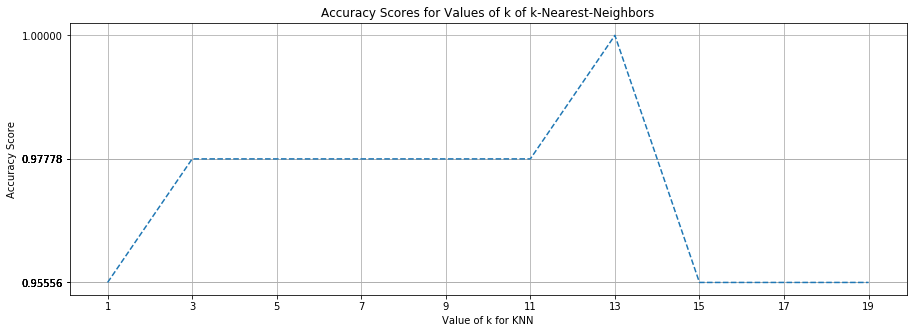

In [18]:
from sklearn import metrics

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20,2))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k)
    # input the train data to train KNN
    knn.fit(X_train,y_train)
    # see KNN prediction by inputting the test data
    y_pred=knn.predict(X_test)
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 7
The optimal score is 0.95


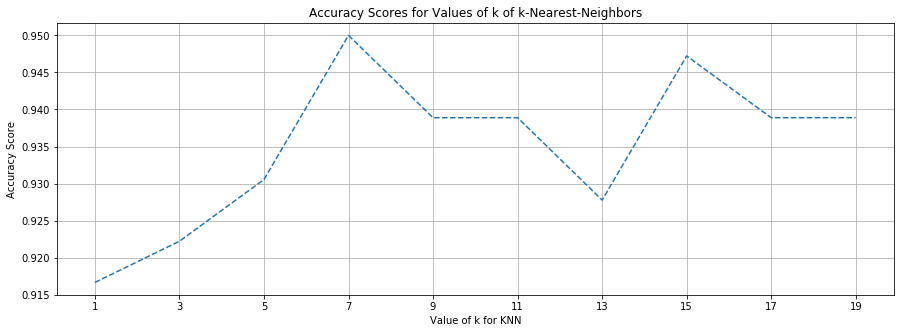

In [21]:
# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20, 2))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    # get score for the 10 fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)

plt.grid()
plt.show()

In [28]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

#print(grid.grid_scores_)
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
